In [4]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'clothing-dataset-full:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F929774%2F1572891%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T074148Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f2da4f4402cb9ef2b93e60a5d14662f3409c60b2c72e6f2033d59f932995ed7634762e6dd4fc7f95e230ce273891ee5e1b418aede125507918a5285f42239670378d3c465425bfddbf5615bd6f03b8a217d69e936c95af30b3cb7ea8b4e44b8d7b99b22d58ef541e562df9d4faacb9ea836d3ab306ad544da485225e9a12c56d96707bfe71771b50cce2fce8672ce0130d010245027fbe1e1bcf0f93cc78ae29f941bcd3169daf6094e1df6eb4c4545e0e846bebed34a49ab6aef3a67a000f3fe596f1e209573d1a9f6e352df681b596457e320e45c8fca6cd0d2e06e793d964d1d08c043994d7973ee19a96f82515658c2a1fe8161e711a61c62c9f86b61f3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 6982357507 bytes downloaded
Downloaded and uncompressed: clothing-dataset-full
Data source import complete.


In [5]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

csv_file = r'/kaggle/input/clothing-dataset-full/images.csv'

base_directory = '/kaggle/input/clothing-dataset-full/images_original'
dest_dir = '/kaggle/working/new_dataset'

data = pd.read_csv(csv_file)

train_dir = '/kaggle/working/train_dataset'
val_dir = '/kaggle/working/val_dataset'
test_dir = '/kaggle/working/test_dataset'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def move_images(data, dest_dir):
    for index, row in data.iterrows():
        image_path = row['image'] + ".jpg"
        class_name = row['label']
        src_path = os.path.join(base_directory, image_path)
        dest_path = os.path.join(dest_dir, class_name)

        os.makedirs(dest_path, exist_ok=True)

        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)

move_images(train_data, train_dir)

move_images(val_data, val_dir)

move_images(test_data, test_dir)


**Skip Folder Delete**

In [6]:
import shutil
import os

folder_path = '/kaggle/working/train_dataset/Skip'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/train_dataset/Skip and its contents have been deleted.


In [7]:
import shutil
import os

folder_path = '/kaggle/working/test_dataset/Skip'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/test_dataset/Skip does not exist.


In [8]:
import shutil
import os

folder_path = '/kaggle/working/val_dataset/Skip'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/val_dataset/Skip and its contents have been deleted.


**Delete Folder Not Sure**

In [9]:
import shutil
import os

folder_path = '/kaggle/working/val_dataset/Not sure'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/val_dataset/Not sure and its contents have been deleted.


In [10]:
import shutil
import os

folder_path = '/kaggle/working/test_dataset/Not sure'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/test_dataset/Not sure and its contents have been deleted.


In [11]:
import shutil
import os

folder_path = '/kaggle/working/train_dataset/Not sure'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/kaggle/working/train_dataset/Not sure and its contents have been deleted.


**Model Create**

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

train_dir = '/kaggle/working/train_dataset'
val_dir = '/kaggle/working/val_dataset'

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(18, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3610 images belonging to 18 classes.
Found 772 images belonging to 18 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/10
112/112 [==============================] - 328s 3s/step - loss: 1.7247 - accuracy: 0.4980 - val_loss: 2.1843 - val_accuracy: 0.2188
Epoch 2/10
112/112 [==============================] - 288s 3s/step - loss: 1.1275 - accuracy: 0.6565 - val_loss: 1.6727 - val_accuracy: 0.5859
Epoch 3/10
112/112 [==============================] - 282s 3s/step - loss: 0.9474 - accuracy: 0.7077 - val_loss: 1.3832 - val_accuracy: 0.5990
Epoch 4/10
112/112 [==============================] - 238s 2s/step - loss: 0.8418 - accuracy: 0.7420 - val_loss: 1.2026 - val_accuracy: 0.6419
Epoch 5/10
112/112 [==============================] - 275s 2s/step - loss: 0.7639 - accuracy: 0.7577 - val_loss: 1.2483 - val_accuracy: 0.6250
Epoch 6/10
112/112 [==============================] - 244s 2s/step - loss: 0.7022 - accuracy: 0.7745 - val_loss: 1.4514 - val_accuracy: 0.5846
Epoch 7/10
112/112 [==============================] - 278s 2s/step - loss: 0.6578 - accuracy: 0.7904 - val_loss: 1.3458 - val_accuracy: 0.6133

In [14]:
model.save('classifier_model_20EPOCH_VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Matrix Generator**

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

predicciones = model.predict(test_generator)

Found 781 images belonging to 18 classes.
25/25 [==============================] - 55s 2s/step


In [16]:
import numpy as np
y_pred = np.argmax(predicciones, axis=1)

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = model.predict(test_generator)

matrix_confusion = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix_confusion, annot=True, fmt="d", linewidths=.5, square=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.savefig('matrix_confusion.jpg')
plt.show()


25/25 [==============================] - 46s 2s/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

**Image Prediction**

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = '/kaggle/working/val_dataset/Hoodie/3975a9b1-ef23-4688-95f8-3500c1850c1b.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [20]:
predictions = model.predict(img_array)

class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 2s 2s/step
Predicted Class: Polo


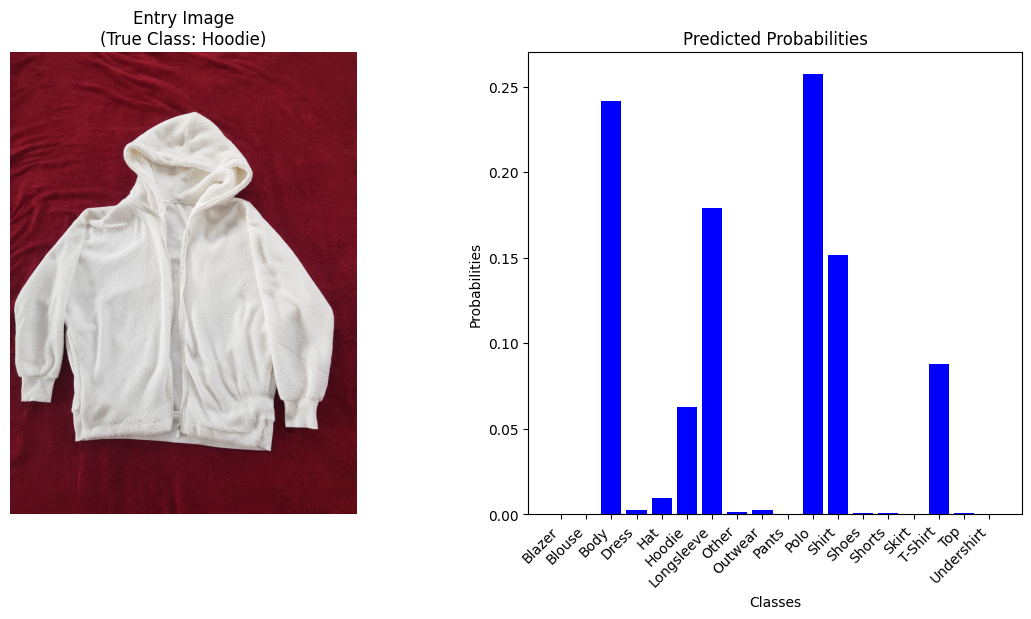

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

true_class = image_path.split('/')[-2]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Entry Image\n(True Class: {})'.format(true_class))

plt.subplot(1, 2, 2)
plt.bar(class_labels, predictions.flatten(), color='blue')
plt.xlabel('Classes')
plt.ylabel('Probabilities')
plt.title('Predicted Probabilities')
plt.xticks(rotation=45, ha='right')

plt.show()
